In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output
import time as t

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Running on: {device}")

Running on: cpu


In [2]:
x = torch.linspace(-np.pi,np.pi,100)
y = x**2 + np.sin(x) - 2*np.cos(3*x) + torch.rand(x.shape)*2

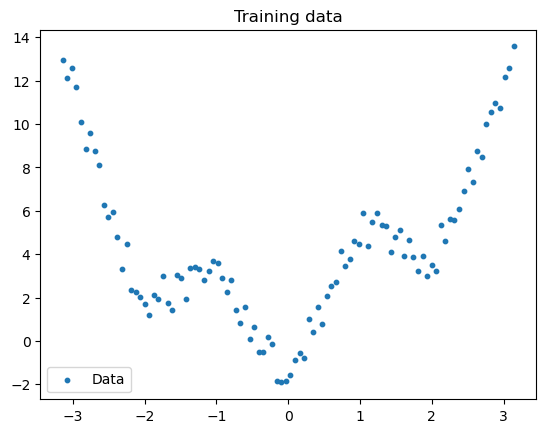

In [3]:
plt.scatter(x, y, s=10, label='Data')
plt.title("Training data")
plt.legend()
plt.show()

In [ ]:
#m = nn.ReLU()

class SingleNeuronModel(nn.Module):
    # On the init function we define our model (which layers are we going to use)
    def __init__(self):
        super().__init__() # Constructor of parent class
        #self.single_neuron =  nn.ReLU()
        m = nn.ReLU()
        input = y
        output=m(y)
        #nn.init.normal_(self.single_neuron.weight, mean=0, std=1)


    # On the foreward model we indicate how to make one 'pass' of the model
    def forward(self, x):
        return self.single_neuron(x)

In [9]:
model = torch.nn.Sequential(
    torch.nn.Linear(1, 100),
    torch.nn.ReLU()
)

# Define the loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [10]:
epochs = 200
for i in range(epochs): 
    optimizer.zero_grad()
    pred = model(x)
    loss = criterion(pred, y)
    loss.backward()
    optimizer.step()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x100 and 1x100)

In [8]:
class NeuronNetworkModel(nn.Module):
    # On the init function we define our model (which layers are we going to use)
    def __init__(self):
        super().__init__() # Constructor of parent class
        self.network =  nn.Linear(1, 1), nn.ReLU()
        nn.init.normal_(self.network.weight, mean=0, std=1)


    # On the foreward model we indicate how to make one 'pass' of the model
    def forward(self, x):
        return self.single_neuron(x)

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 30)
        self.fc2 = nn.Linear(30, 30)
        self.fc3 = nn.Linear(30, 30)
        self.fc4 = nn.Linear(30, 30)
        self.fc5 = nn.Linear(30, 30)
        self.fc6 = nn.Linear(30, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.fc6(x)
        return x

In [12]:
start_model = Net().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(start_model.parameters(), lr=0.01)
X = torch.reshape(x, (x.shape[0],1)).to(device)  
Y = torch.reshape(y, (y.shape[0],1)).to(device)

In [23]:
for epoch in range(200):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()

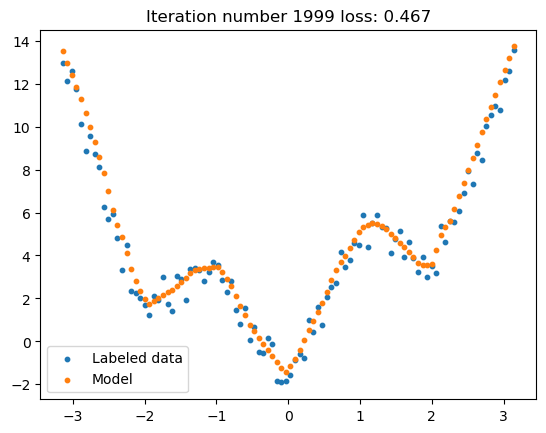

In [13]:
import copy

def plotCurrentModel(x, y, model, ax):
    # Torch receives inputs with shape [Examples, input_size]
    model_y = model(X).cpu().detach().numpy()

    ax.scatter(x, y, s=10, label='Labeled data')
    p = ax.scatter(x, model_y, s=10, label='Model')
    ax.set_title('Default model')
    ax.legend()
    return p


ex_model = copy.deepcopy(start_model)

loss_mse = nn.MSELoss() # Define loss function
optimizer = torch.optim.SGD(ex_model.parameters(), lr=2e-2) # Define optimization algorithm
epochs = 2000

ex_model.train()

for i in range(epochs): 
    # A (basic) training step in PyTorch consists of four basic parts:
    # 1.   Set all the gradients to zero using `opt.zero_grad()`
    # 2.   Calculate the loss, `loss`
    # 3.   Calculate the gradients with respect to the loss using `loss.backward()`
    # 4.   Update the parameters being optimized using `opt.step()`
    optimizer.zero_grad()
    pred = ex_model(X)
    loss = loss_mse(pred, Y)
    # Backpropagation
    loss.backward()
    optimizer.step()
    
    clear_output(wait=True)
    fig, ax = plt.subplots(1,1)
    title = f"Iteration number {i} loss: {loss:0.3f}"
    print(title, end='\r')
    plotCurrentModel(X, Y, ex_model, ax)
    ax.set_title(title)
        # display.display(plt.gcf())
    plt.show()

In [19]:
    if i % 10 == 0:
        clear_output(wait=True)
        fig, ax = plt.subplots(1,1)
        title = f"Iteration number {i} loss: {loss:0.3f}"
        print(title, end='\r')
        plotCurrentModel(x, y, ex_model, ax)
        ax.set_title(title)
        # display.display(plt.gcf())
        plt.show()
        plt.plot(X.numpy(), Y.numpy(), 'b')
        plt.plot(X.numpy(), net(X).data.numpy(), 'r')
        plt.show()

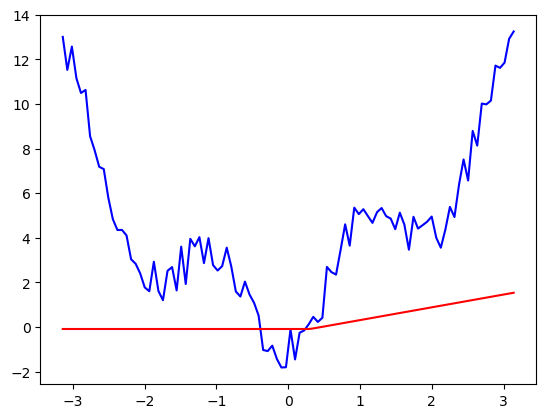